<h1><center><u>SAC -- 2D Navigation Robot(particle) Environment</u></center></h1> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib notebook
%matplotlib nbagg

from robolearn.envs.simple_envs.goal_composition import GoalCompositionEnv
from robolearn.envs.normalized_box_env import NormalizedBoxEnv

from robolearn.torch.models import NNQFunction, NNVFunction

from robolearn.torch.policies import TanhGaussianPolicy

from robolearn.torch.rl_algos.sac.sac import SoftActorCritic

from robolearn.utils.data_management import SimpleReplayBuffer

from robolearn.utils.launchers.launcher_util import setup_logger
import robolearn.torch.pytorch_util as ptu

<IPython.core.display.Javascript object>


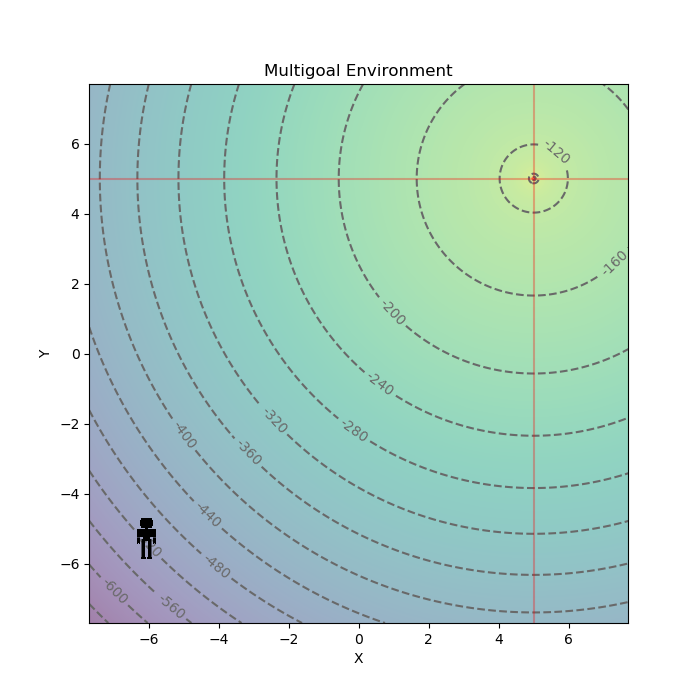

<IPython.core.display.Javascript object>


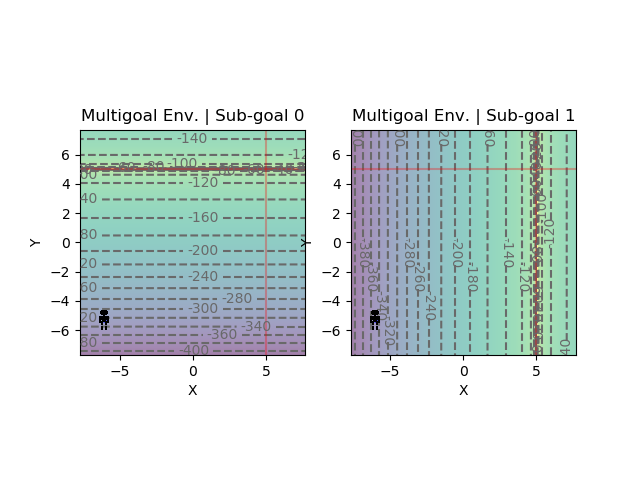

In [2]:
# Environment
env = GoalCompositionEnv(
    goal_reward=50,
    actuation_cost_coeff=0.5,
    distance_cost_coeff=1.5,
    log_distance_cost_coeff=10.0,
    alpha=1e-3,
    # Initial Condition
    init_position=(-4., -4.),
    init_sigma=1.50,
    # Goal
    goal_position=(5., 5.),
    goal_threshold=0.05,
    # Others
    dynamics_sigma=0.1,
    # horizon=PATH_LENGTH,
    horizon=None,
)

# Normalize environment
env = NormalizedBoxEnv(
    env,
    normalize_obs=False,
    online_normalization=False,
    obs_mean=None,
    obs_var=None,
    obs_alpha=0.001,
)

# Visualize costs
env.reset()
env.render()
env.close()

# IU-SAC

In [3]:
# Common parameters
n_unintentions = env.n_subgoals
obs_dim = np.prod(env.observation_space.shape)
action_dim = np.prod(env.action_space.shape)

In [4]:
# --------------------- #
# Value Function Models #
# --------------------- #

# Hyperparameters
net_size = 32

# Intentional Value function --> Environment goal (full task)
i_qf = NNQFunction(obs_dim=obs_dim,
                  action_dim=action_dim,
                  hidden_sizes=(net_size, net_size))

i_qf2 = NNQFunction(obs_dim=obs_dim,
                   action_dim=action_dim,
                   hidden_sizes=(net_size, net_size))

i_vf = NNVFunction(obs_dim=obs_dim,
                  hidden_sizes=(net_size, net_size))

In [5]:
# ------ #
# Policy #
# ------ #

# Hyperparameters
net_size = 32
n_unshared_layers = 2

policy = TanhGaussianPolicy(
    obs_dim=obs_dim,
    action_dim=action_dim,
    hidden_sizes=[net_size for _ in range(n_unshared_layers)], 
    std=None, 
    reparameterize=True,
)

In [6]:
# --------- #
# Algorithm #
# --------- #

# Hypeparameters
render = False
reward_scale=1.0e-1
n_epochs = 100
replay_buffer_size = 1e3
batch_size=128

paths_per_epoch = 5
paths_per_eval = 3
path_length = 50

algo_hyperparams = dict(
    # Common RL algorithm params
    num_steps_per_epoch=paths_per_epoch * path_length,
    num_epochs=n_epochs,
    num_updates_per_train_call=1,
    num_steps_per_eval=paths_per_eval * path_length,
    # EnvSampler params
    max_path_length=path_length,
    render=render,
    # SAC params
    min_steps_start_train=batch_size,
    min_start_eval=paths_per_epoch * path_length,
    reparameterize=True,
    action_prior='uniform',
    entropy_scale=1.0e-0,
    
    discount=0.99,
    reward_scale=reward_scale,
)

# Logger
setup_logger('notebook_2d_nav',
             variant=algo_hyperparams,
             snapshot_mode='gap_and_last',
             snapshot_gap=25,
             log_dir=None,
             log_stdout=False,
            )

# Replay Buffer
replay_buffer = SimpleReplayBuffer(
    max_replay_buffer_size=replay_buffer_size,
    obs_dim=obs_dim,
    action_dim=action_dim
)


algorithm = SoftActorCritic(
    env=env,
    policy=policy,
    qf=i_qf,
    vf=i_vf,
    replay_buffer=replay_buffer,
    batch_size=batch_size,
    qf2=i_qf2,
    eval_env=env,
    save_environment=False,
    **algo_hyperparams,
)

2018-09-21 21:10:47.912998 CEST | Variant:
2018-09-21 21:10:47.913799 CEST | {
  "num_steps_per_epoch": 250,
  "num_epochs": 100,
  "num_updates_per_train_call": 1,
  "num_steps_per_eval": 150,
  "max_path_length": 50,
  "render": false,
  "min_steps_start_train": 128,
  "min_start_eval": 250,
  "reparameterize": true,
  "action_prior": "uniform",
  "entropy_scale": 1.0,
  "discount": 0.99,
  "reward_scale": 0.1
}


In [7]:
seed = 10
start_epoch = 0

env.seed(seed)
ptu.seed(seed)

algorithm.train(start_epoch=start_epoch)

TODO: WE NEED LOG_DIAGNOSTICS IN ENV


A Jupyter Widget

TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
TODO: WE NEED LOG_DIAGNOSTICS IN ENV
T

Max path length: 50


No traceback available to show.


<IPython.core.display.Javascript object>


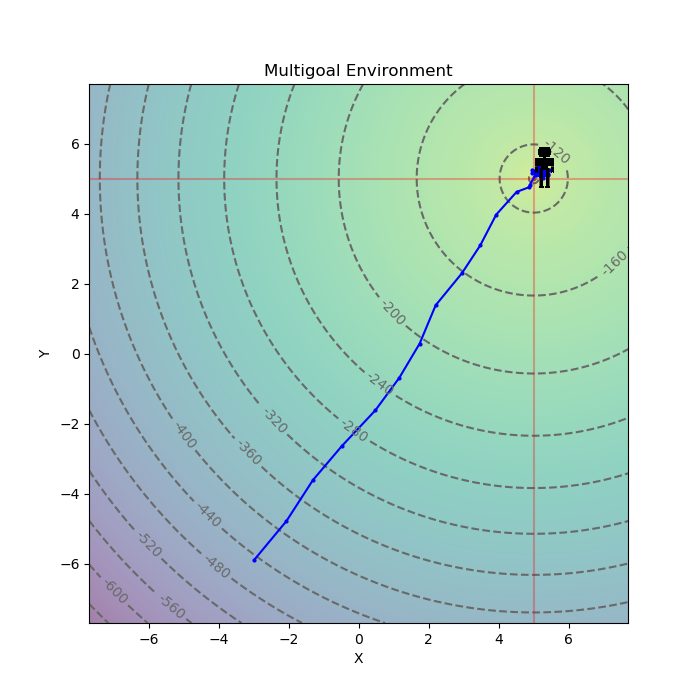

<IPython.core.display.Javascript object>


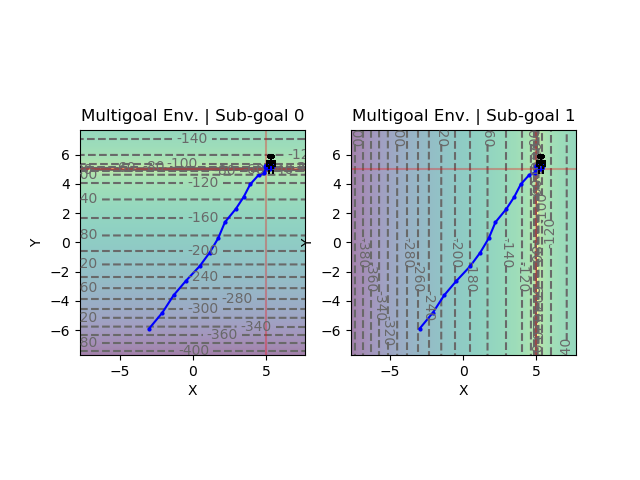

In [8]:
# Test
%tb
deterministic = True
print('Max path length:', path_length)

env.close()
obs = env.reset()
for t in range(path_length):
    env.render()
    action, pol_info = policy.get_action(obs, deterministic=deterministic)
    obs, reward, done, env_info = env.step(action)
#     print('obs:', obs, '| goal:', env.wrapped_env.goal_position, ' | reward:', reward)
#     print('---')
    if done:
        print('Environment done!')
        break